# Dimensionality Reduction 
### Principal Component Analysis and Linear Discriminant Analysis

by Henry Bechtel

Dimensionality Reduction of a high dimensional dataset has several advantages, one of which is visuallization. Visualizing data is a critical part in the analysis of data, however, it is virtually impossible to visualize data in greater than 3 dimensions, making it harder to fully "understand" datasets with many features. Dimensionality reduction involves finding the underlying, "latent variables" that are driving patterns in the data. 

#### Some benefits of dimensionality reduction:
- Visualization and understanding of high dimensional data
- Noise filtering, gaurds against overfitting
- Removes redundant features (multicollinearity) for feature extraction -> model stability/interpretability 
- Speed up training time of models
- Data compression


In this tutorial we will explore two commonly used dimensionality reduction techniques: One that's unsupervised, Principal Component Analysis (PCA) and one that's supervised, Linear Discriminant Analysis (LDA).


### Importing dependancies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
from sklearn.datasets import california_housing

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]

### Motivational Example
Let's look at some familiar data

In [4]:
iris = load_iris()

In [5]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Species'])
X_std = StandardScaler().fit_transform(X)

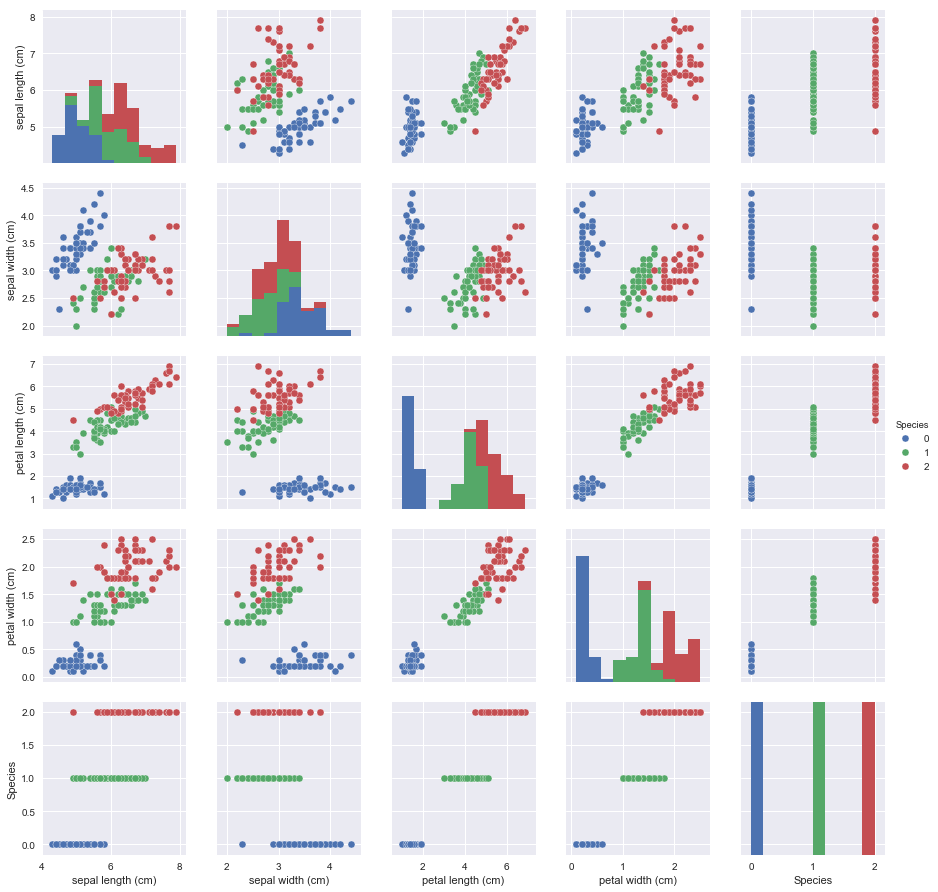

In [6]:
sns.pairplot(pd.concat([X,y],axis=1), hue='Species');

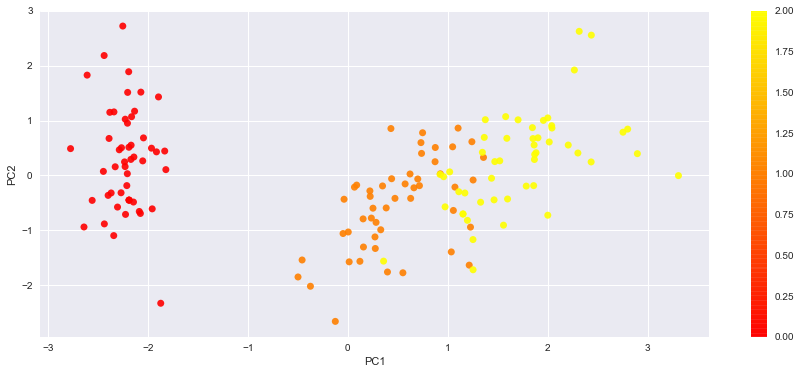

In [7]:
plt.rcParams['figure.figsize'] = [15.0, 6.0]
pca = PCA(n_components=3)
scores = pca.fit_transform(X_std)

plt.scatter(scores[:,0],scores[:,1], alpha=0.9, edgecolors='none', c=y, cmap='autumn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

In [8]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832])

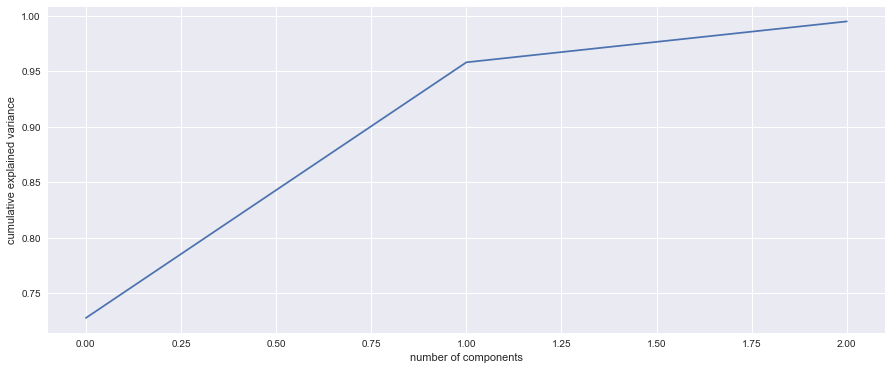

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
loadings = pd.DataFrame(pca.components_, columns=iris.feature_names)
loadings

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.522372         -0.263355           0.581254          0.565611
1           0.372318          0.925556           0.021095          0.065416
2          -0.721017          0.242033           0.140892          0.633801

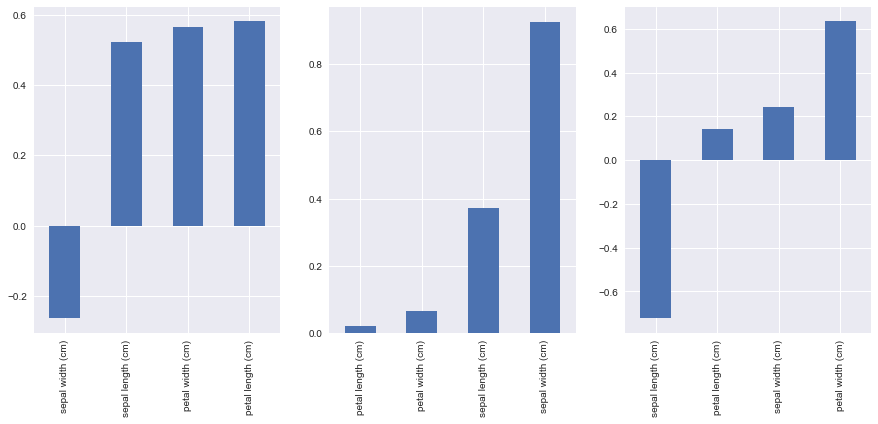

In [11]:
plt.subplot(1,3,1)
loadings.iloc[0,:].sort_values().plot(kind='bar')
plt.subplot(1,3,2)
loadings.iloc[1,:].sort_values().plot(kind='bar');
plt.subplot(1,3,3)
loadings.iloc[2,:].sort_values().plot(kind='bar');

In [12]:
lda = LinearDiscriminantAnalysis(n_components=2)
ldaScores = pd.DataFrame(lda.fit_transform(X,y), columns=['LV1','LV2']);

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


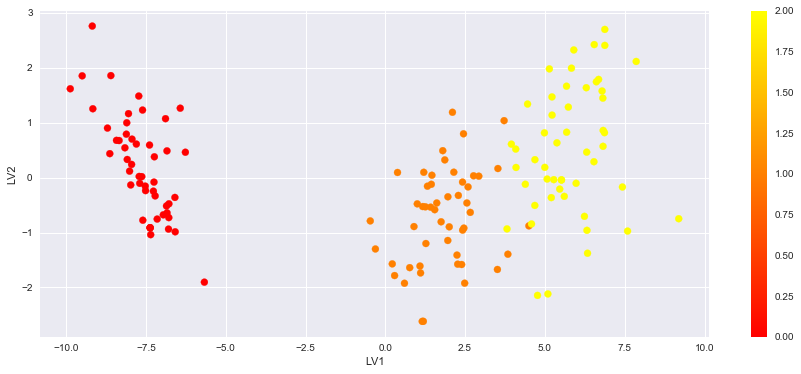

In [13]:
plt.scatter(ldaScores['LV1'],ldaScores['LV2'], c=y, cmap='autumn')
plt.xlabel('LV1')
plt.ylabel('LV2')
plt.colorbar();

### Let's kick back and enjoy some wine! 

In [14]:
wine = pd.read_csv('wine.csv', header=0)
wine.head(5)

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

A lot of the dataset can be understood by visualizing via a pairplot

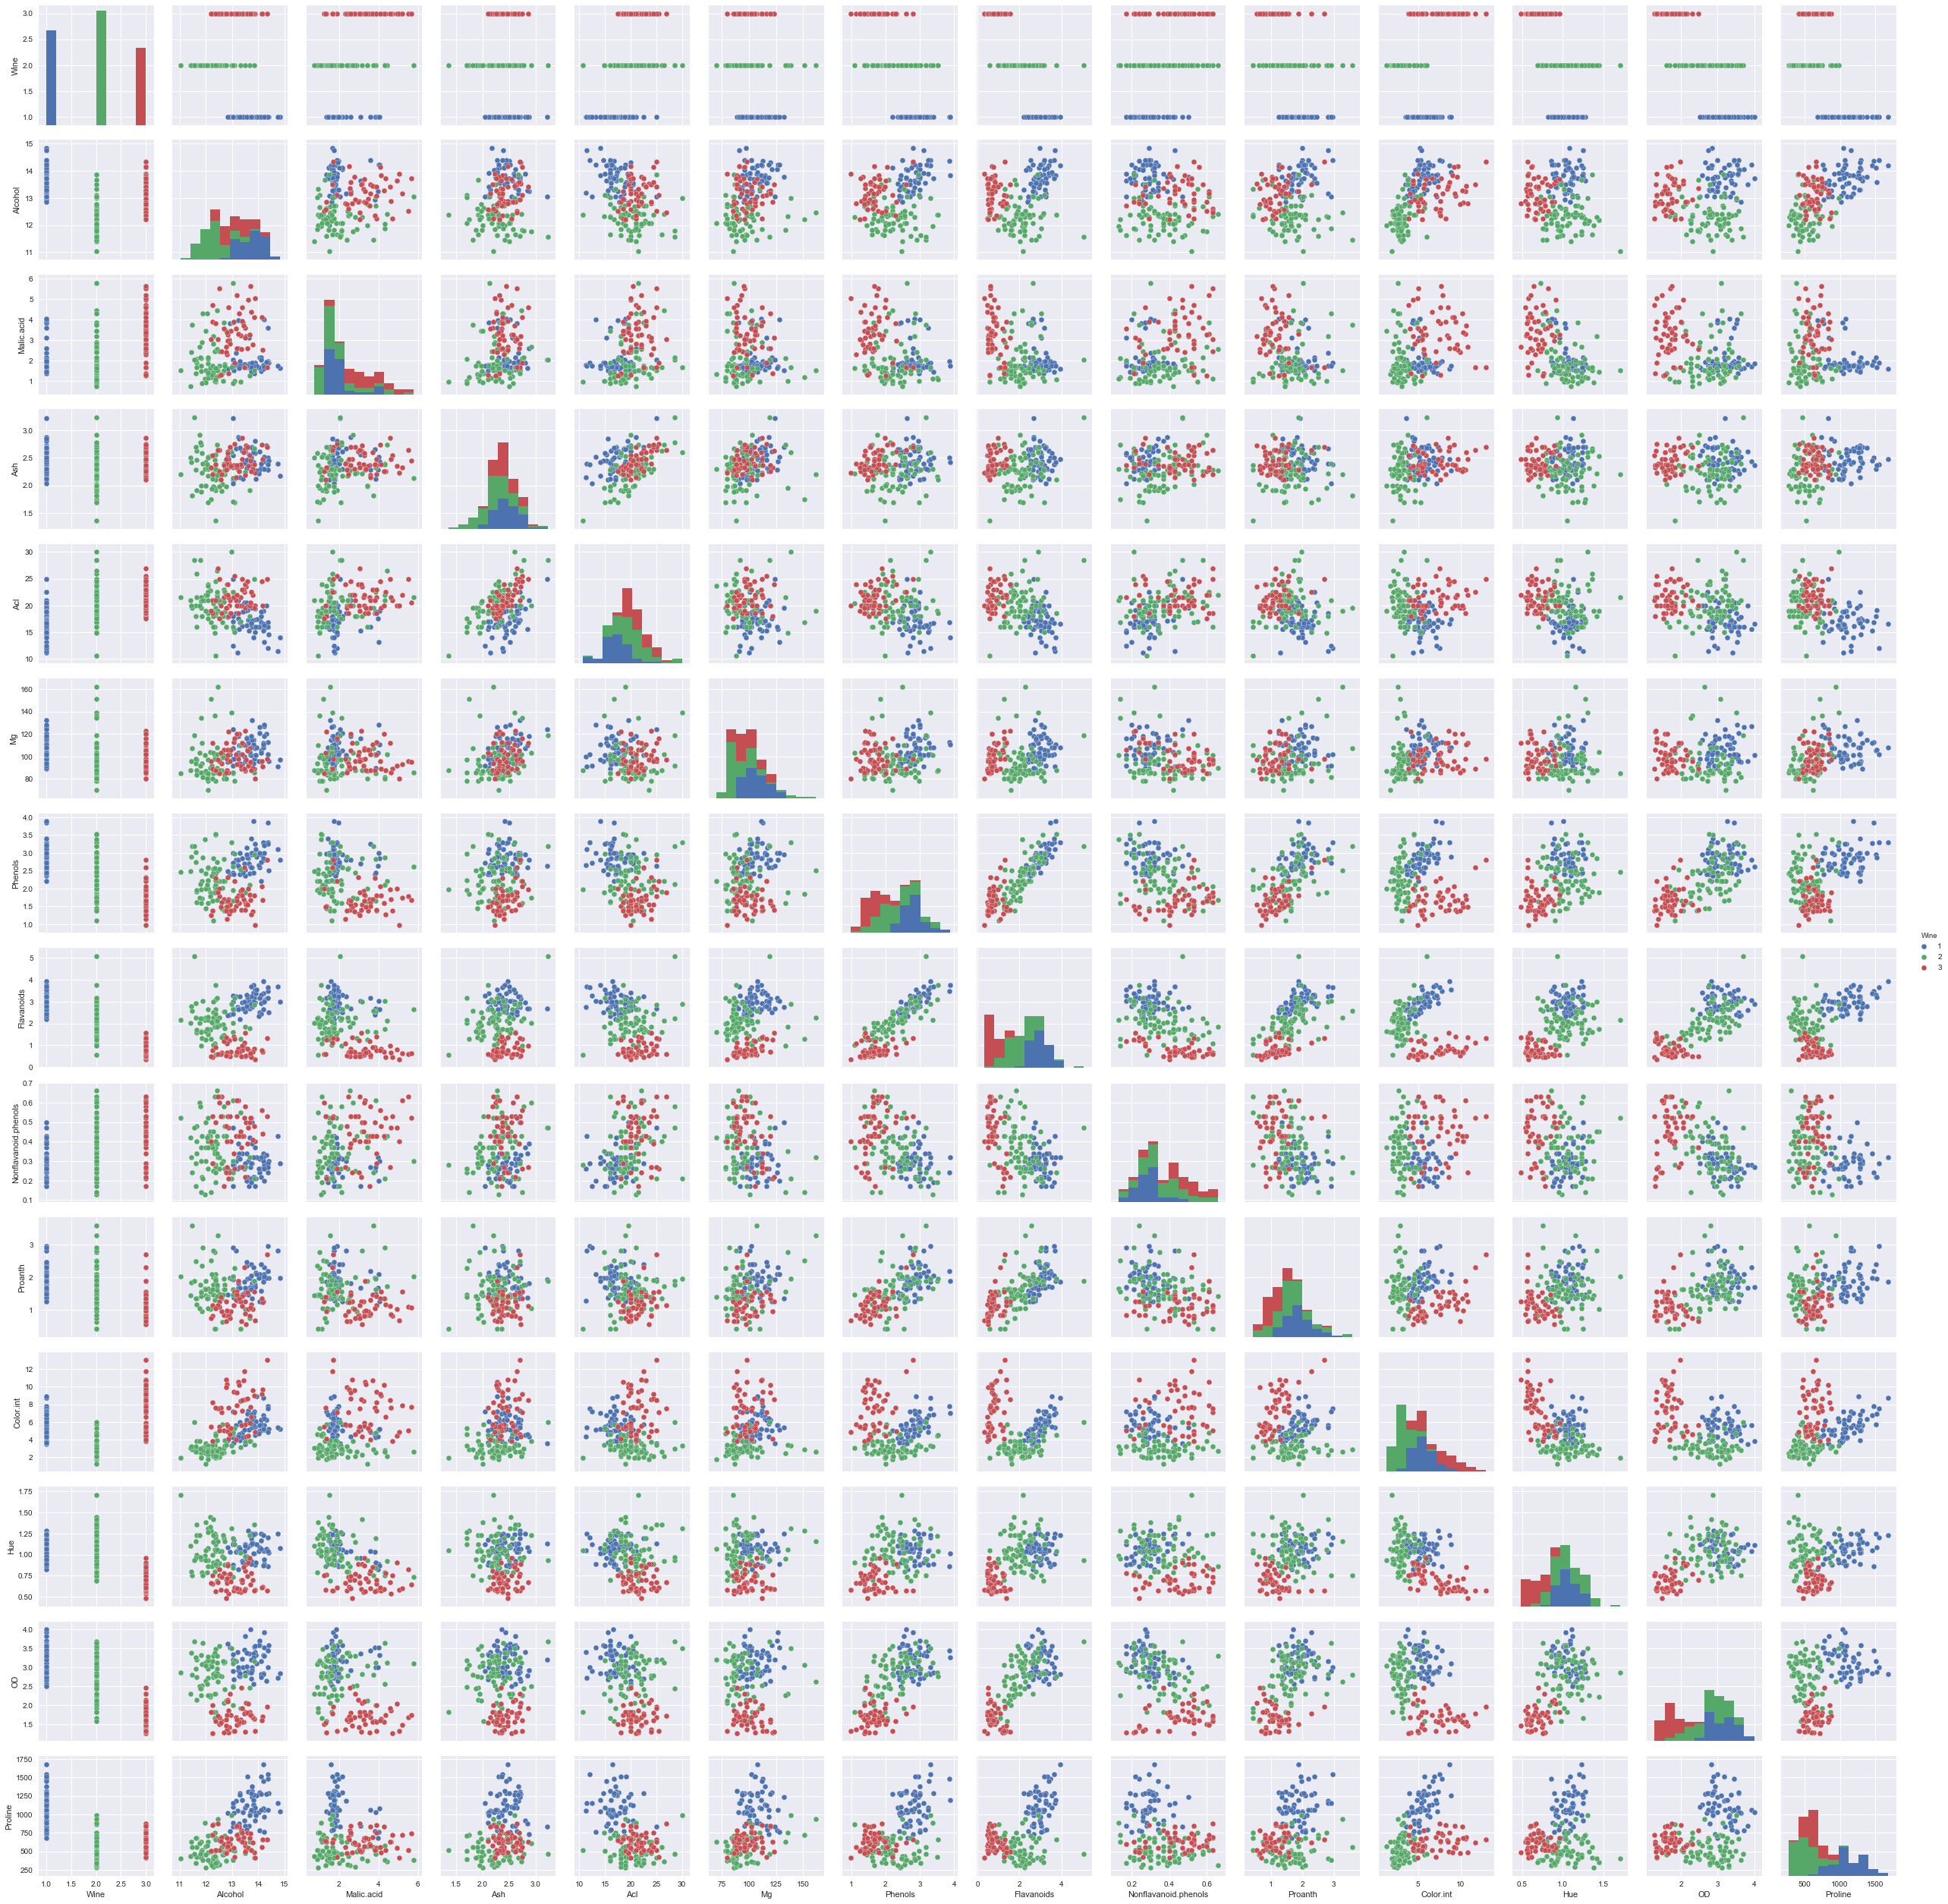

In [15]:
sns.pairplot(wine, hue='Wine');

In [16]:
X = wine.iloc[:,1:]
y = wine.iloc[:,0]
X_std = StandardScaler().fit_transform(X)

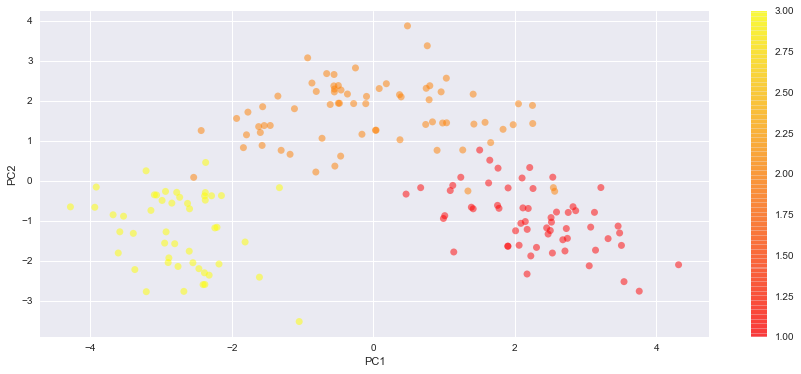

In [17]:
pca = PCA(n_components=4)
scores = pca.fit_transform(X_std)

plt.scatter(scores[:,0],scores[:,1], alpha=0.5, edgecolors='none', c=y, cmap='autumn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

In [18]:
pca.explained_variance_ratio_

array([ 0.36198848,  0.1920749 ,  0.11123631,  0.0706903 ])

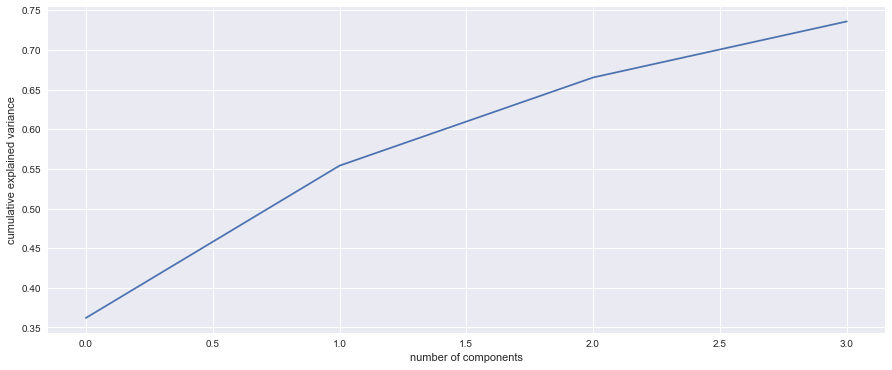

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
loadings = pd.DataFrame(pca.components_, columns=list(wine)[1:])
loadings

Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  Flavanoids  \
0  0.144329   -0.245188 -0.002051 -0.239320  0.141992  0.394661    0.422934   
1 -0.483652   -0.224931 -0.316069  0.010591 -0.299634 -0.065040    0.003360   
2 -0.207383    0.089013  0.626224  0.612080  0.130757  0.146179    0.150682   
3 -0.017856    0.536890 -0.214176  0.060859 -0.351797  0.198068    0.152295   

   Nonflavanoid.phenols   Proanth  Color.int       Hue        OD   Proline  
0             -0.298533  0.313429  -0.088617  0.296715  0.376167  0.286752  
1             -0.028779 -0.039302  -0.529996  0.279235  0.164496 -0.364903  
2              0.170368  0.149454  -0.137306  0.085222  0.166005 -0.126746  
3             -0.203301  0.399057   0.065926 -0.427771  0.184121 -0.232071

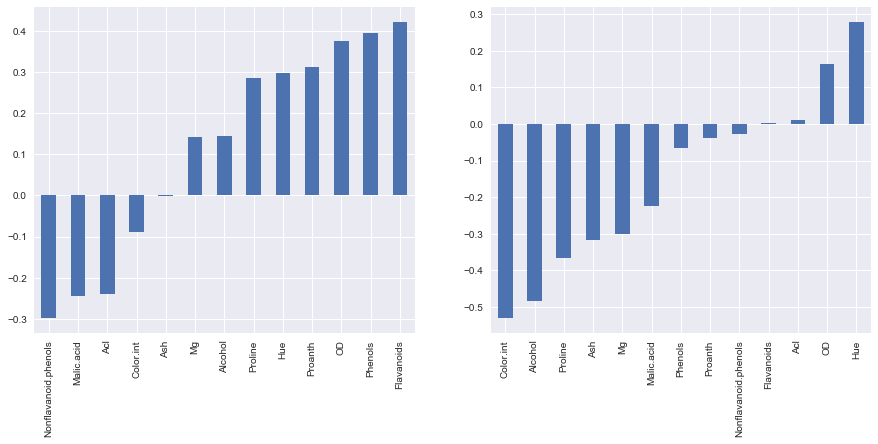

In [21]:
loadings = pd.DataFrame(pca.components_, columns=list(wine)[1:])
plt.subplot(1,2,1)
loadings.iloc[0,:].sort_values().plot(kind='bar')
plt.subplot(1,2,2)
loadings.iloc[1,:].sort_values().plot(kind='bar');

### Boston Housing

In [22]:
boston = load_boston()

In [23]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
X_std = StandardScaler().fit_transform(X)

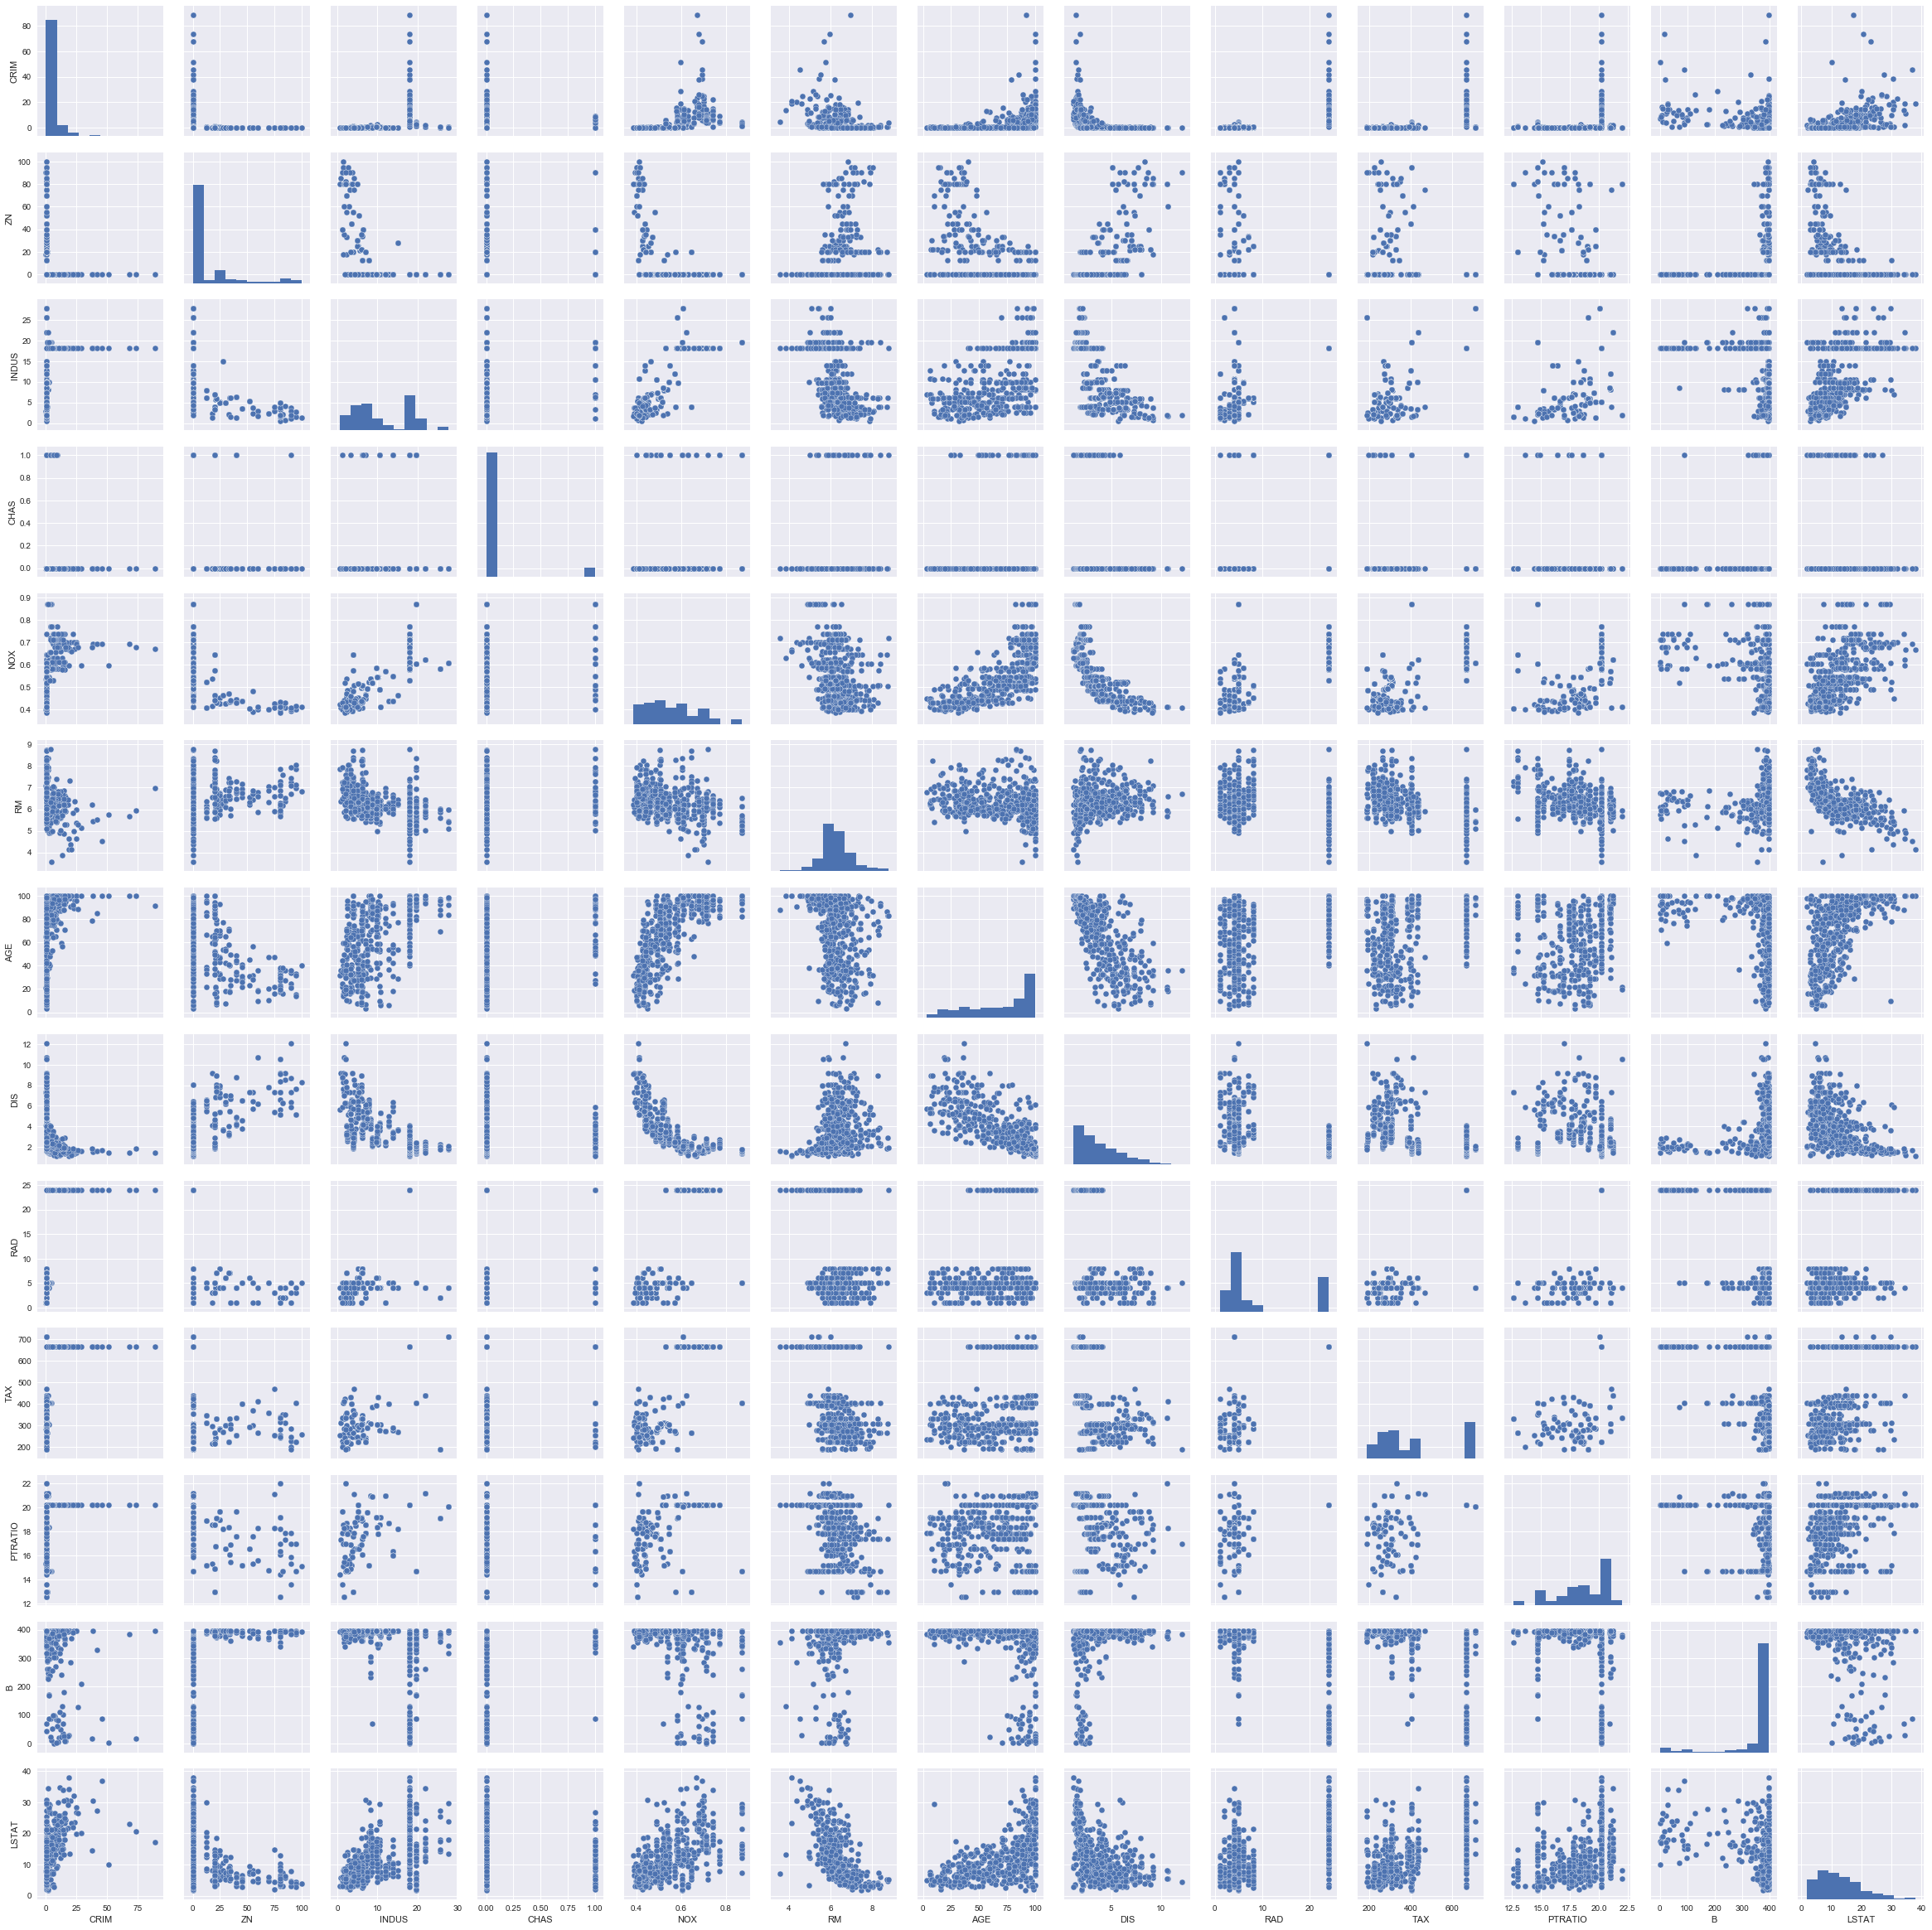

In [25]:
sns.pairplot(X);

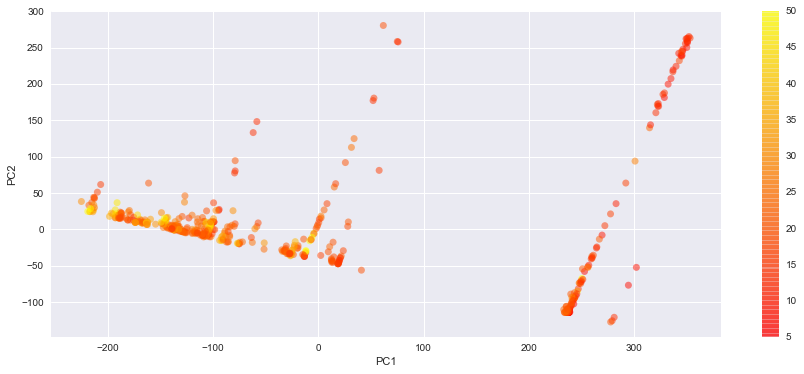

In [26]:
pca = PCA(n_components=2)
scores = pca.fit_transform(X)
#scores = pca.fit_transform(X_std)

plt.scatter(scores[:,0],scores[:,1], alpha=0.5, edgecolors='none', c=y, cmap='autumn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

Whoops! This is what happens when you don't standardize your data!

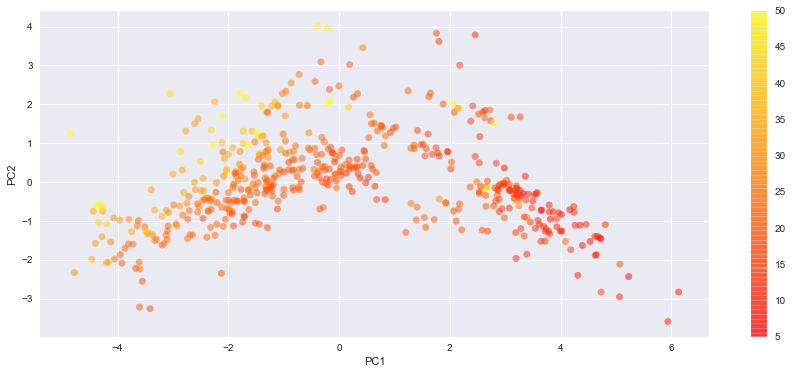

In [27]:
pca = PCA(n_components=3)
scores = pca.fit_transform(X_std)

plt.scatter(scores[:,0],scores[:,1], alpha=0.5, edgecolors='none', c=y, cmap='autumn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

That's better!

Now let's look at the loadings of the princple components:

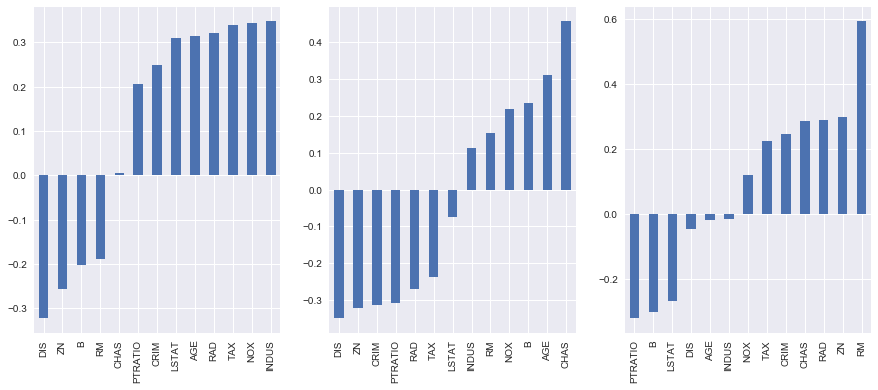

In [28]:
loadings = pd.DataFrame(pca.components_, columns=boston.feature_names)

plt.subplot(1,3,1)
loadings.iloc[0,:].sort_values().plot(kind='bar')
plt.subplot(1,3,2)
loadings.iloc[1,:].sort_values().plot(kind='bar')
plt.subplot(1,3,3)
loadings.iloc[2,:].sort_values().plot(kind='bar');

In [29]:
pca.explained_variance_ratio_

array([ 0.47097344,  0.11015872,  0.09547408])

### Now let's look at something more complex

In [30]:
digits = load_digits()

In [31]:
X = pd.DataFrame(data=digits.data)
y = pd.DataFrame(data=digits.target)

In [32]:
X.shape

(1797, 64)

In [33]:
y.shape

(1797, 1)

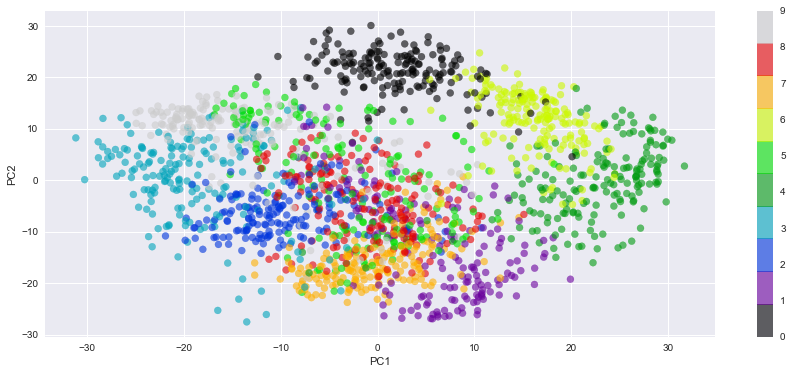

In [34]:
pca = PCA(n_components=2)
scores = pca.fit_transform(X)

plt.scatter(scores[:,0],scores[:,1], alpha=0.6,c=y, 
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

In [35]:
lda = LinearDiscriminantAnalysis(n_components=2)
ldaScores = pd.DataFrame(lda.fit_transform(X,y));

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


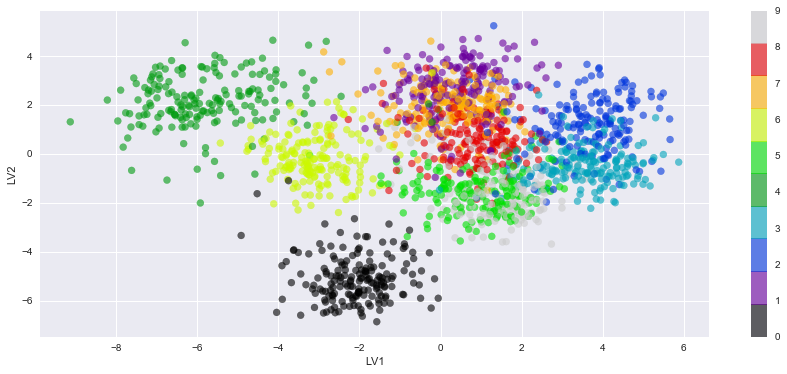

In [36]:
plt.scatter(ldaScores[0],ldaScores[1], alpha=0.6, c=y, cmap=plt.cm.get_cmap('nipy_spectral',10));
plt.xlabel('LV1')
plt.ylabel('LV2')
plt.colorbar();